In [ ]:
%load_ext autoreload
%autoreload 2

from src.data.data_handler import MiniBooNEDataHandler
from src.plotter import NeutrinoPlotter

handler = MiniBooNEDataHandler()
plotter = NeutrinoPlotter()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Import Dataset & Cleaning

In [2]:
df = handler.load()

Loading data...
[STATUS] Loaded 130064 rows, 51 columns.
Signal events: 36,499
Background events: 93,565


In [3]:
df = handler.clean_data()

Removed 466 duplicates
Scaling Recommendations Summary:
   LINEAR  :  14 features
           Examples: col_0, col_3, col_8
           Ranges: -1.0e+03 to 1.7e+01, -1.0e+03 to 7.4e-01, -1.0e+03 to 7.2e+00
   ASINH   :  13 features
           Examples: col_1, col_2, col_6
           Ranges: -1.0e+03 to 8.8e+00, -1.0e+03 to 4.8e+03, -1.0e+03 to 6.2e+00
   SYMLOG  :  23 features
           Examples: col_4, col_5, col_11
           Ranges: -1.0e+03 to 1.8e-01, -1.0e+03 to 7.0e-01, -1.0e+03 to 5.4e+02


## EDA

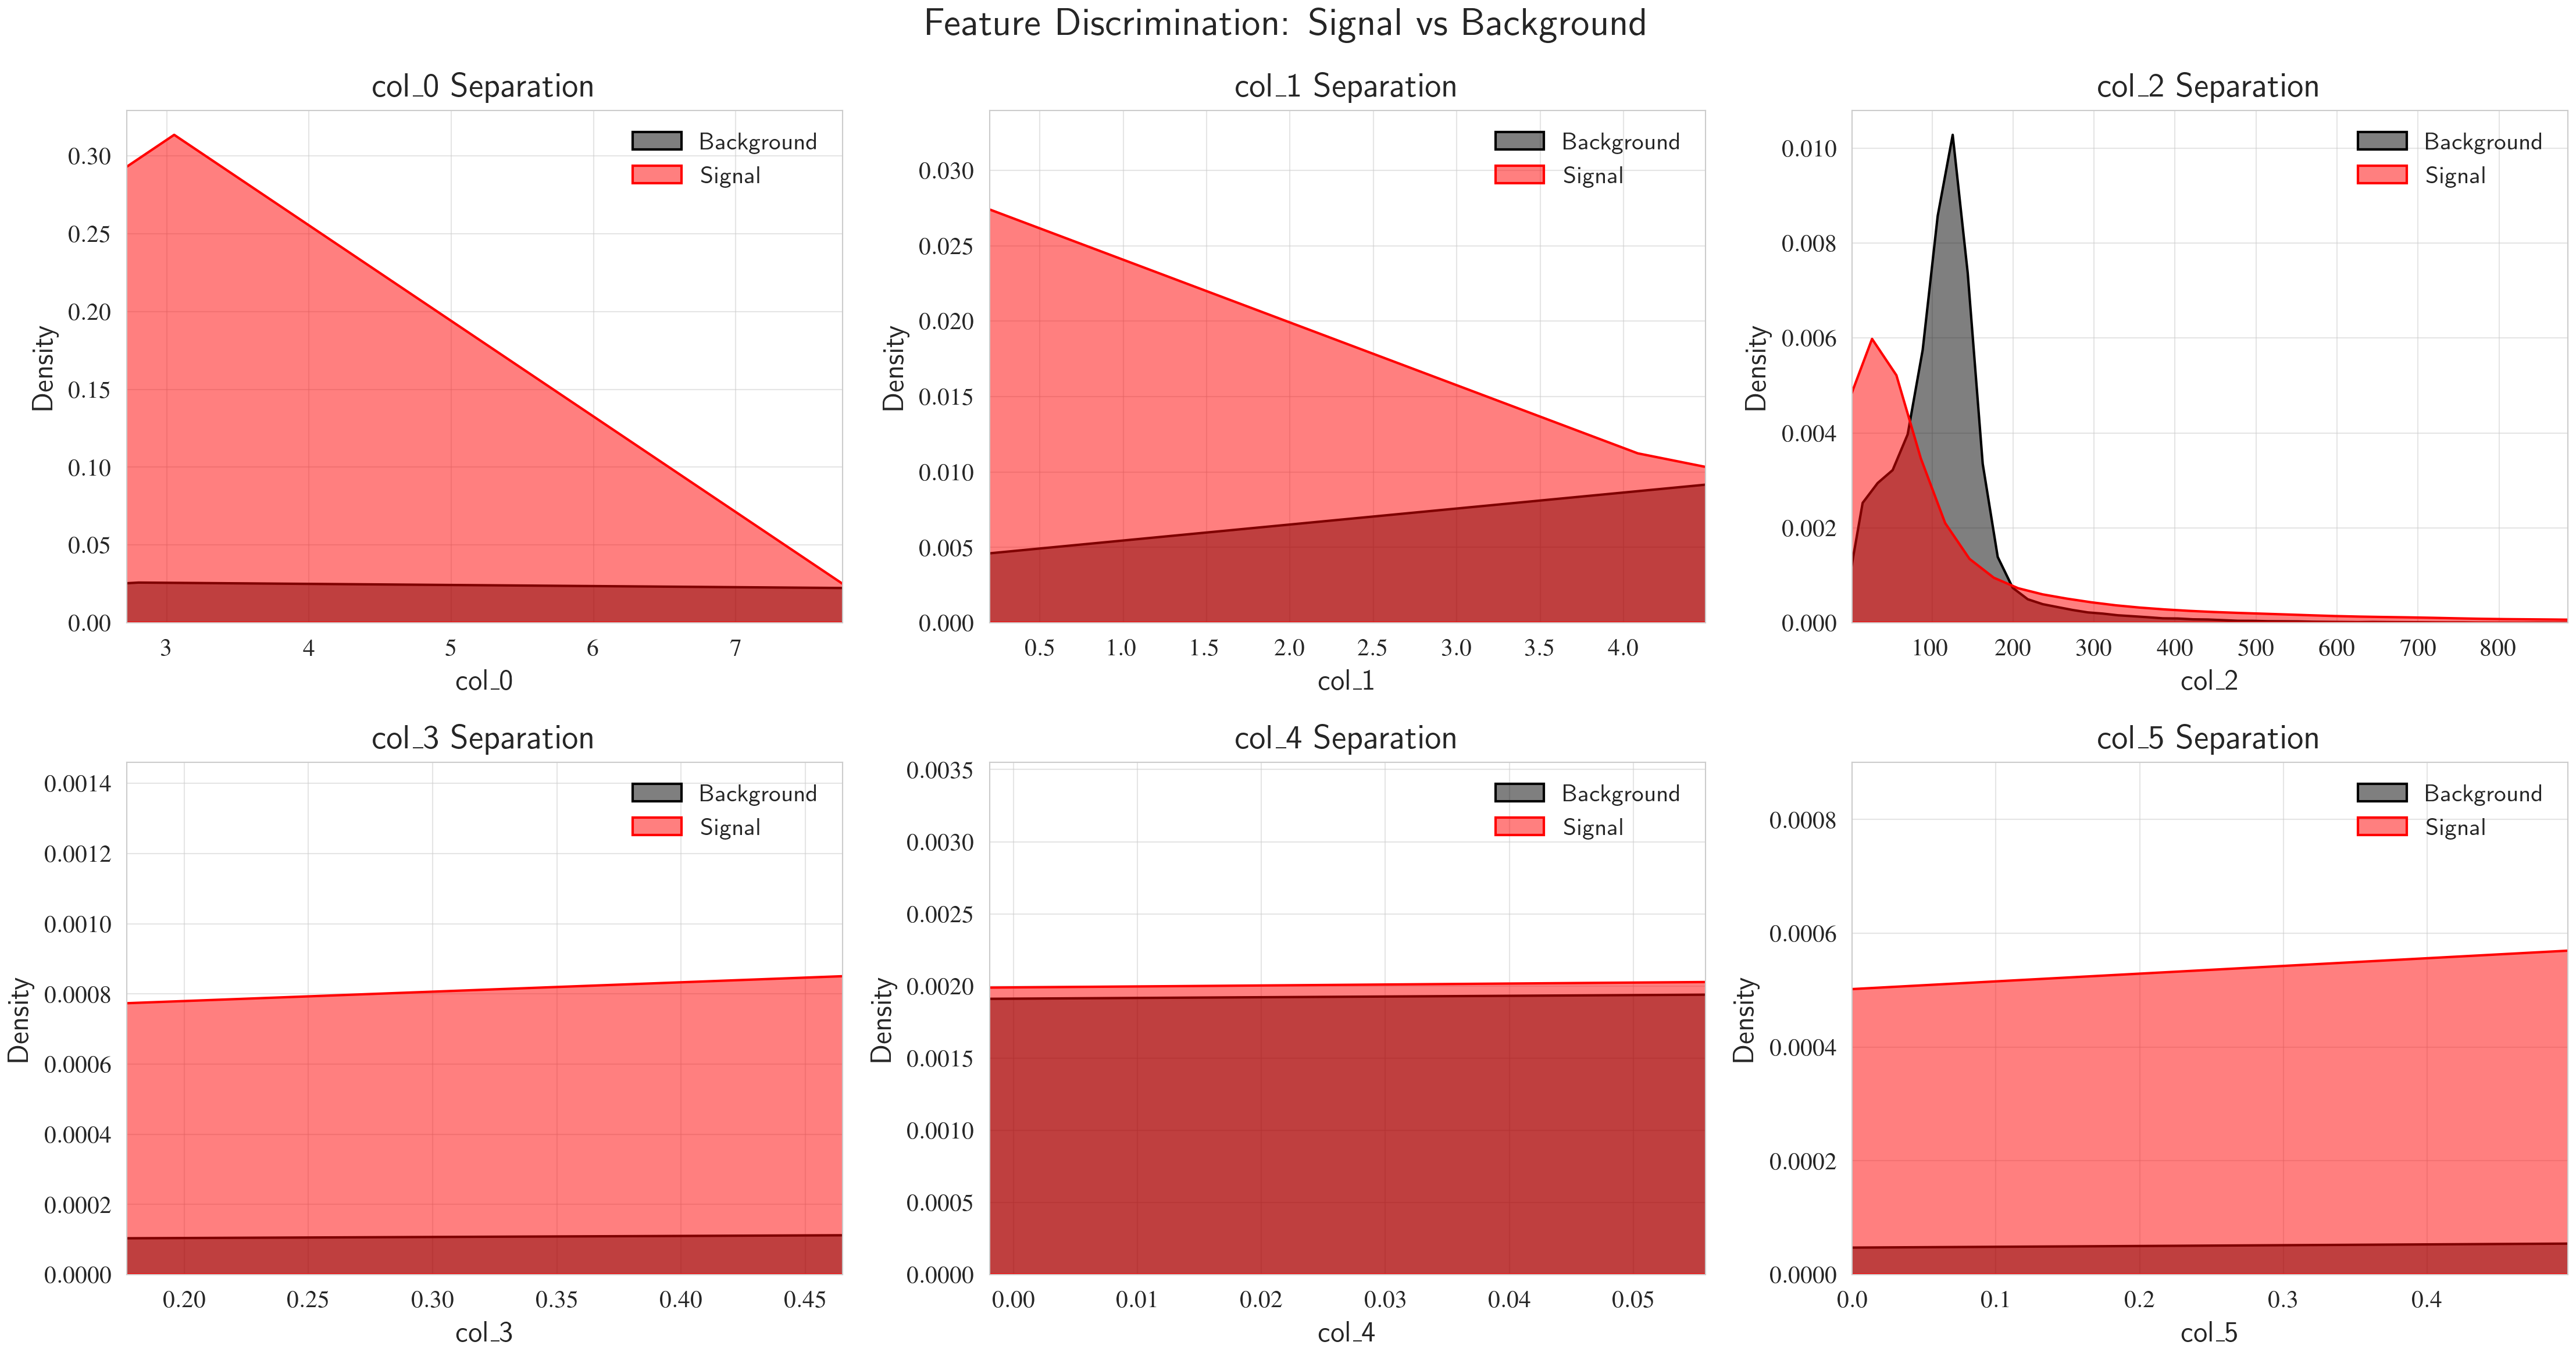

In [ ]:
fig_feat_sep = plotter.plot_feature_separation(df, [f"col_{i}" for i in range(6)])

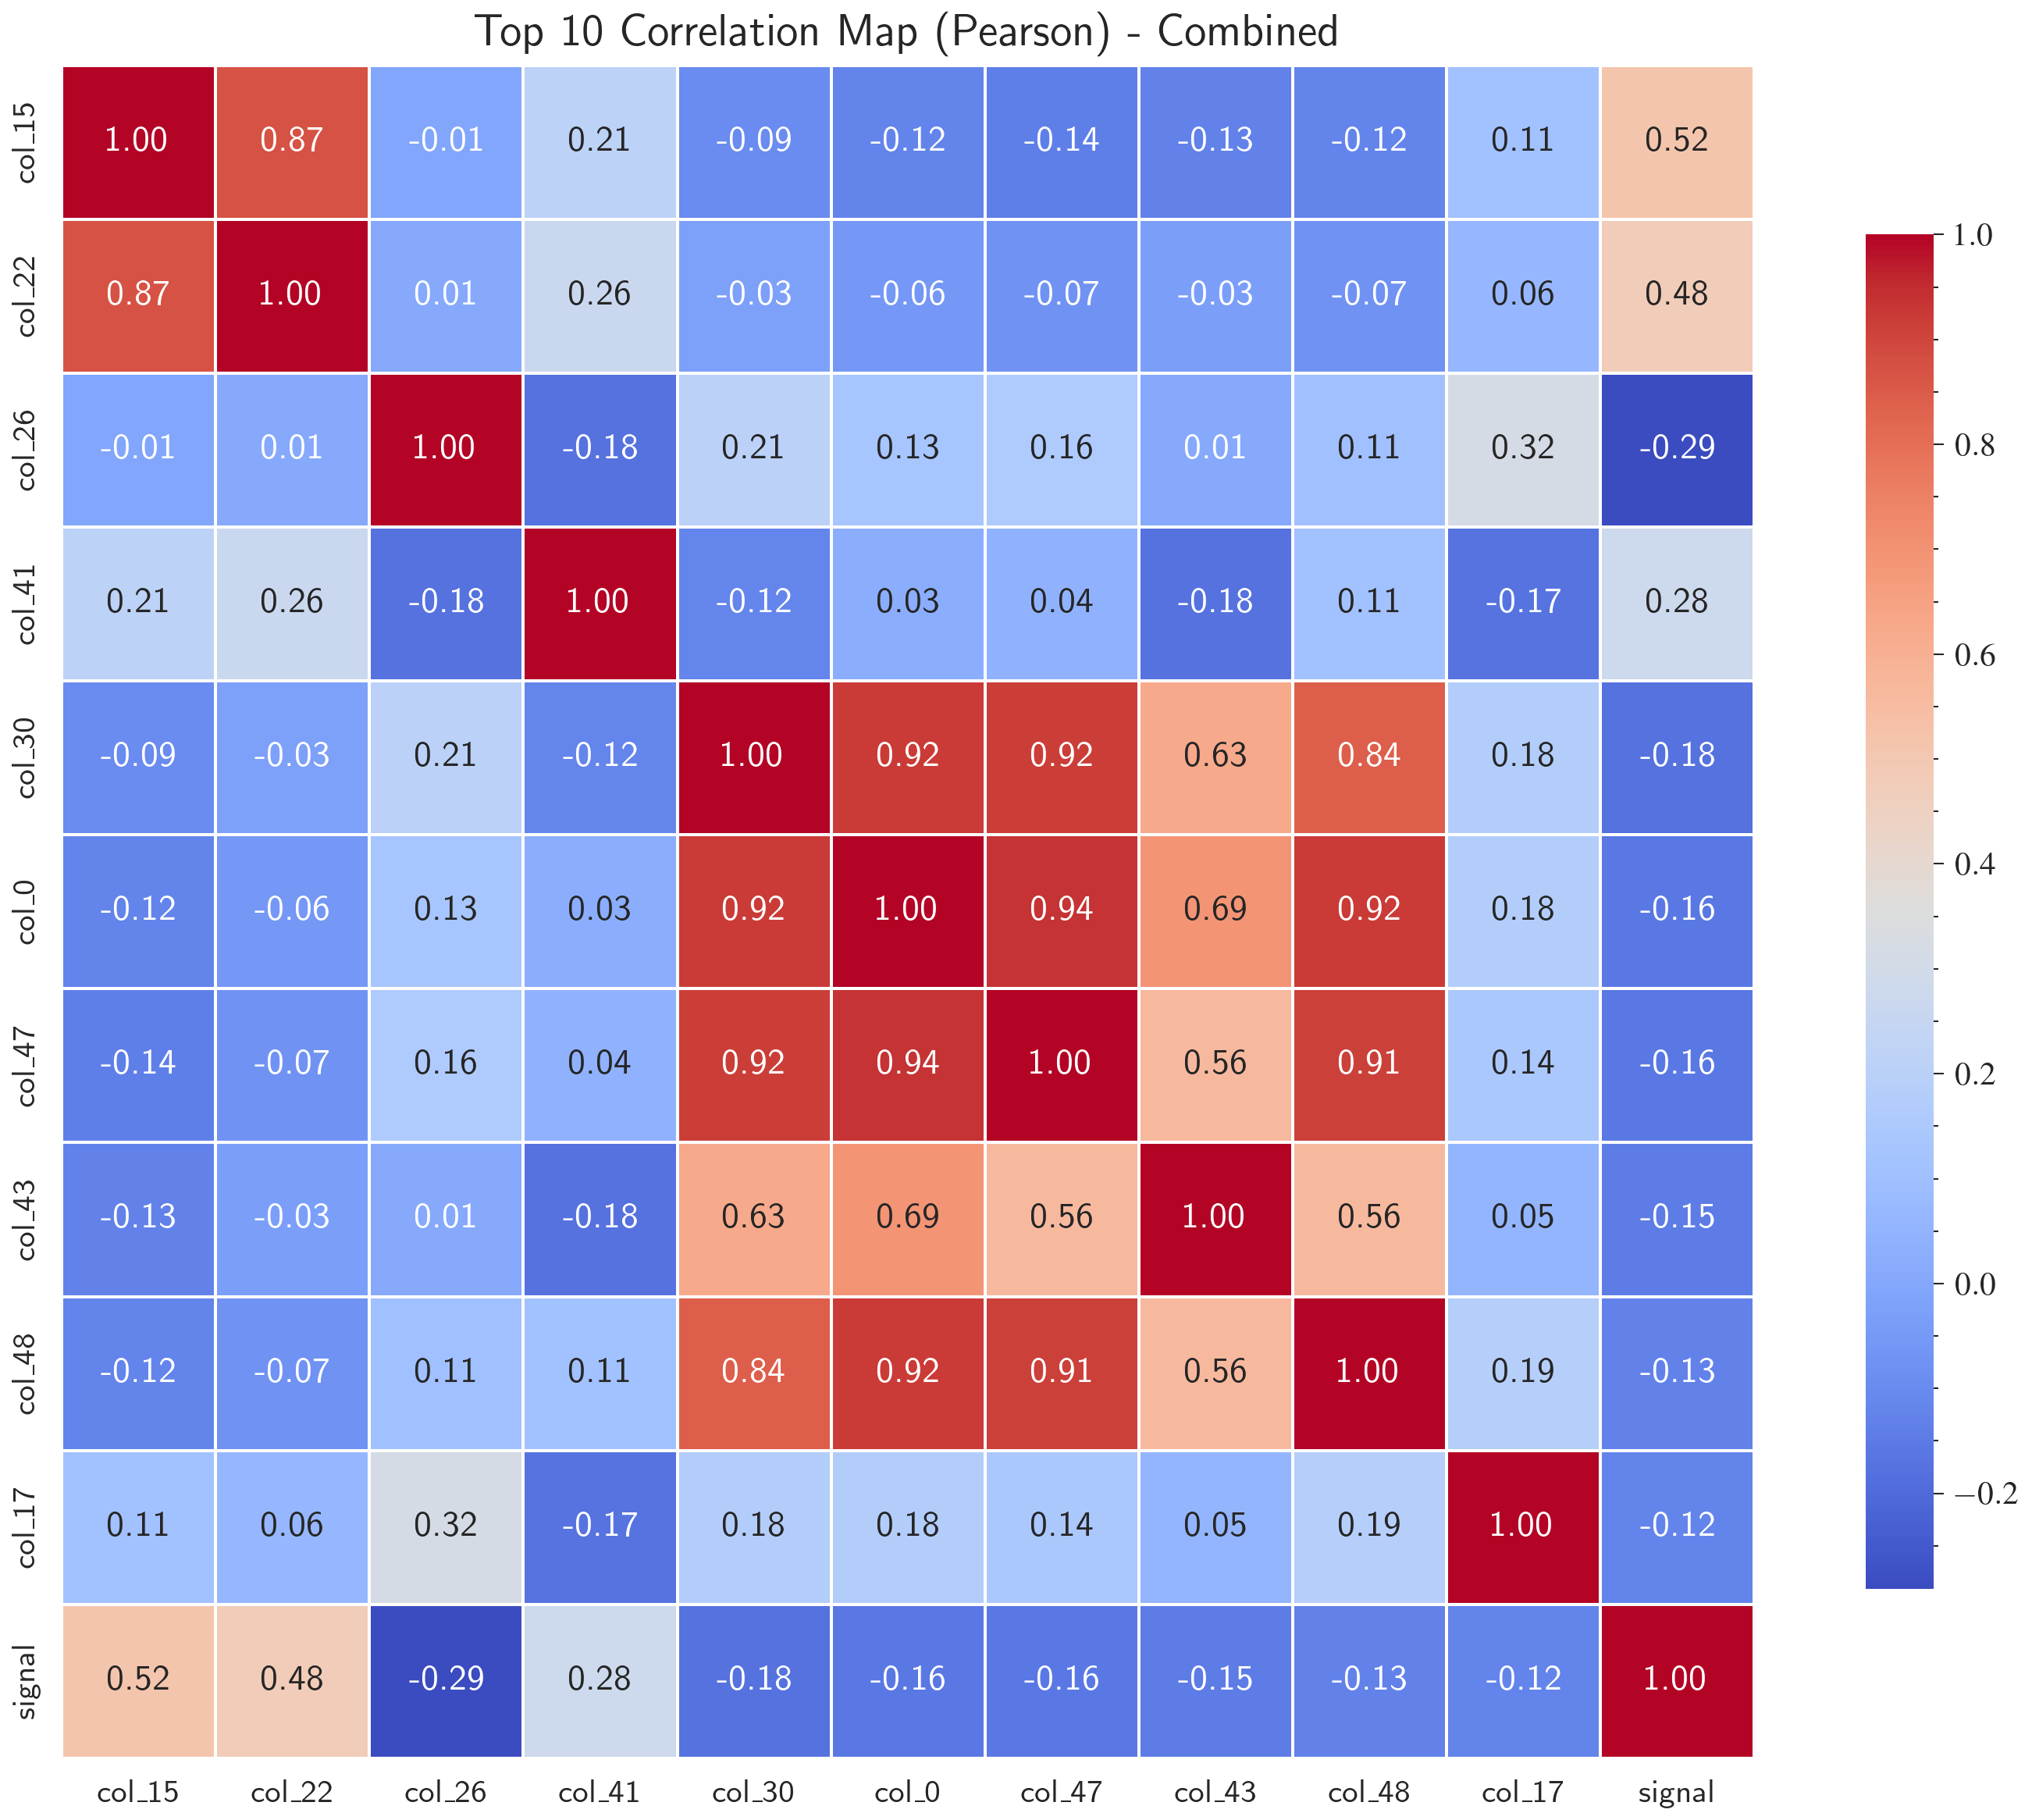

In [ ]:
fig = plotter.plot_top_correlation_map(df, top_n= 10)

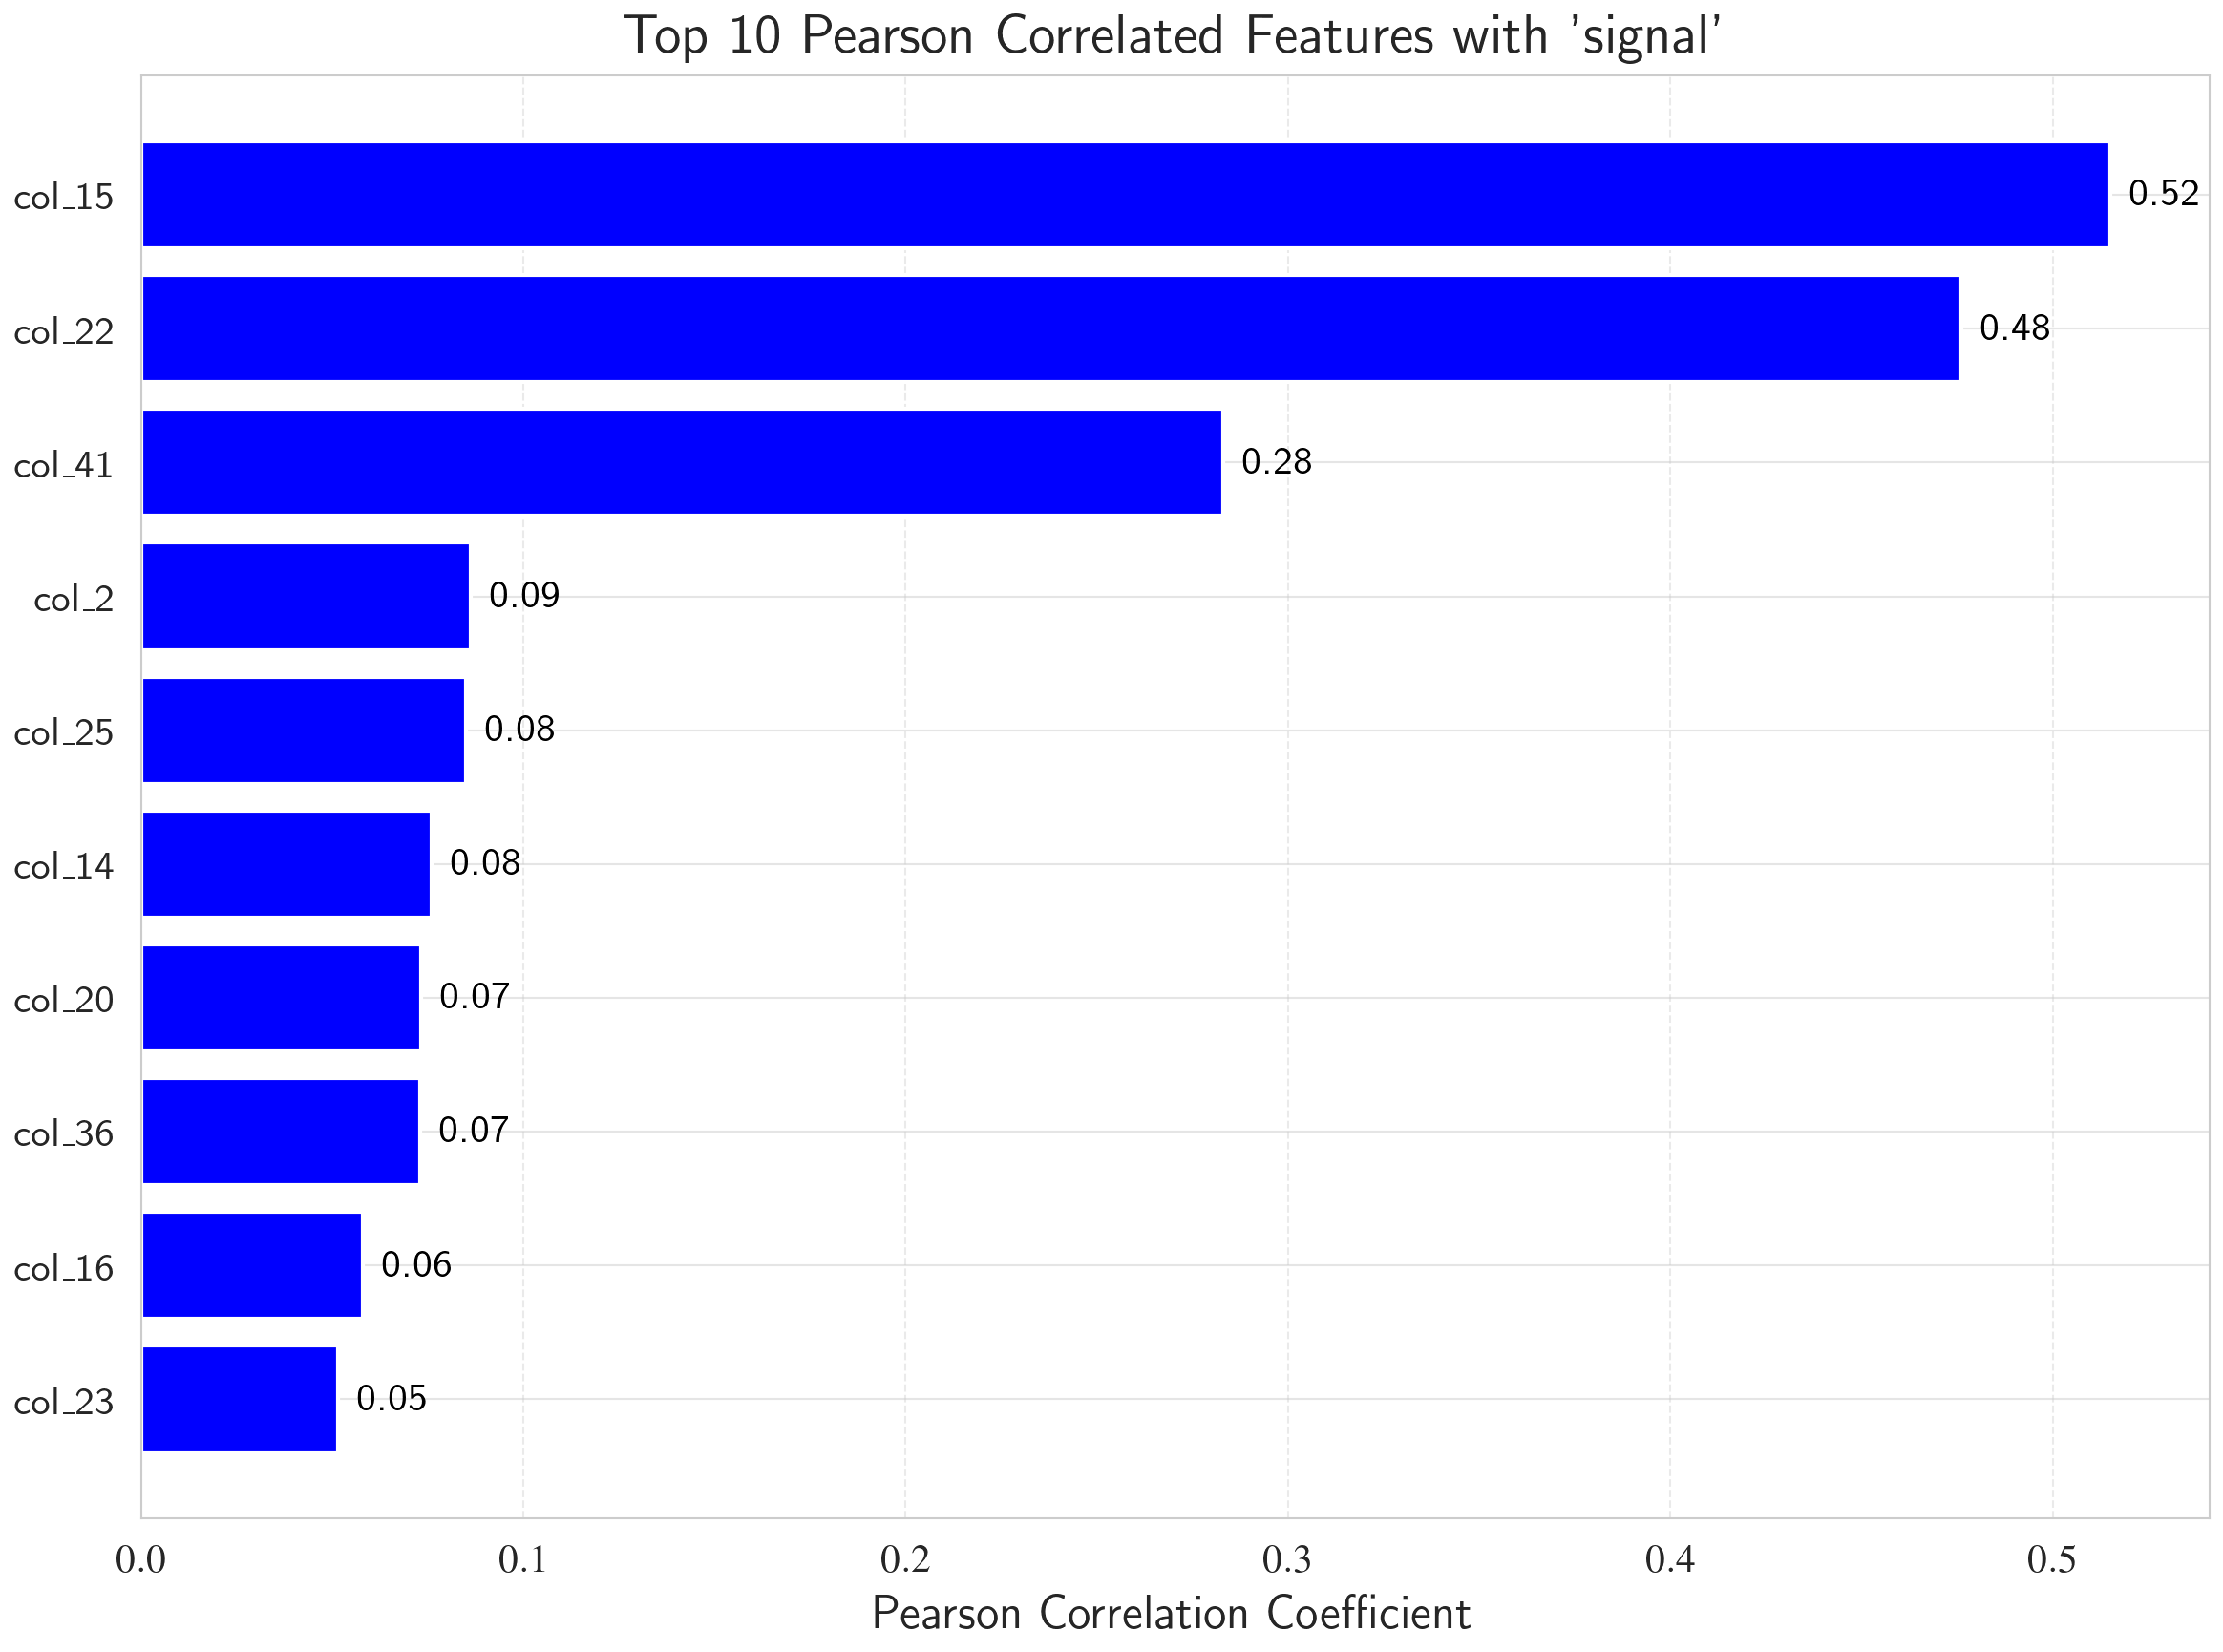

In [ ]:
fig = plotter.plot_top_correlations(df, positive_only=True)

/home/mchadolias/projects/miniboone-classification/.venv/lib64/python3.14/site-packages/numpy/_core/_methods.py:222: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/mchadolias/projects/miniboone-classification/.venv/lib64/python3.14/site-packages/numpy/_core/_methods.py:180: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/mchadolias/projects/miniboone-classification/.venv/lib64/python3.14/site-packages/numpy/_core/_methods.py:214: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


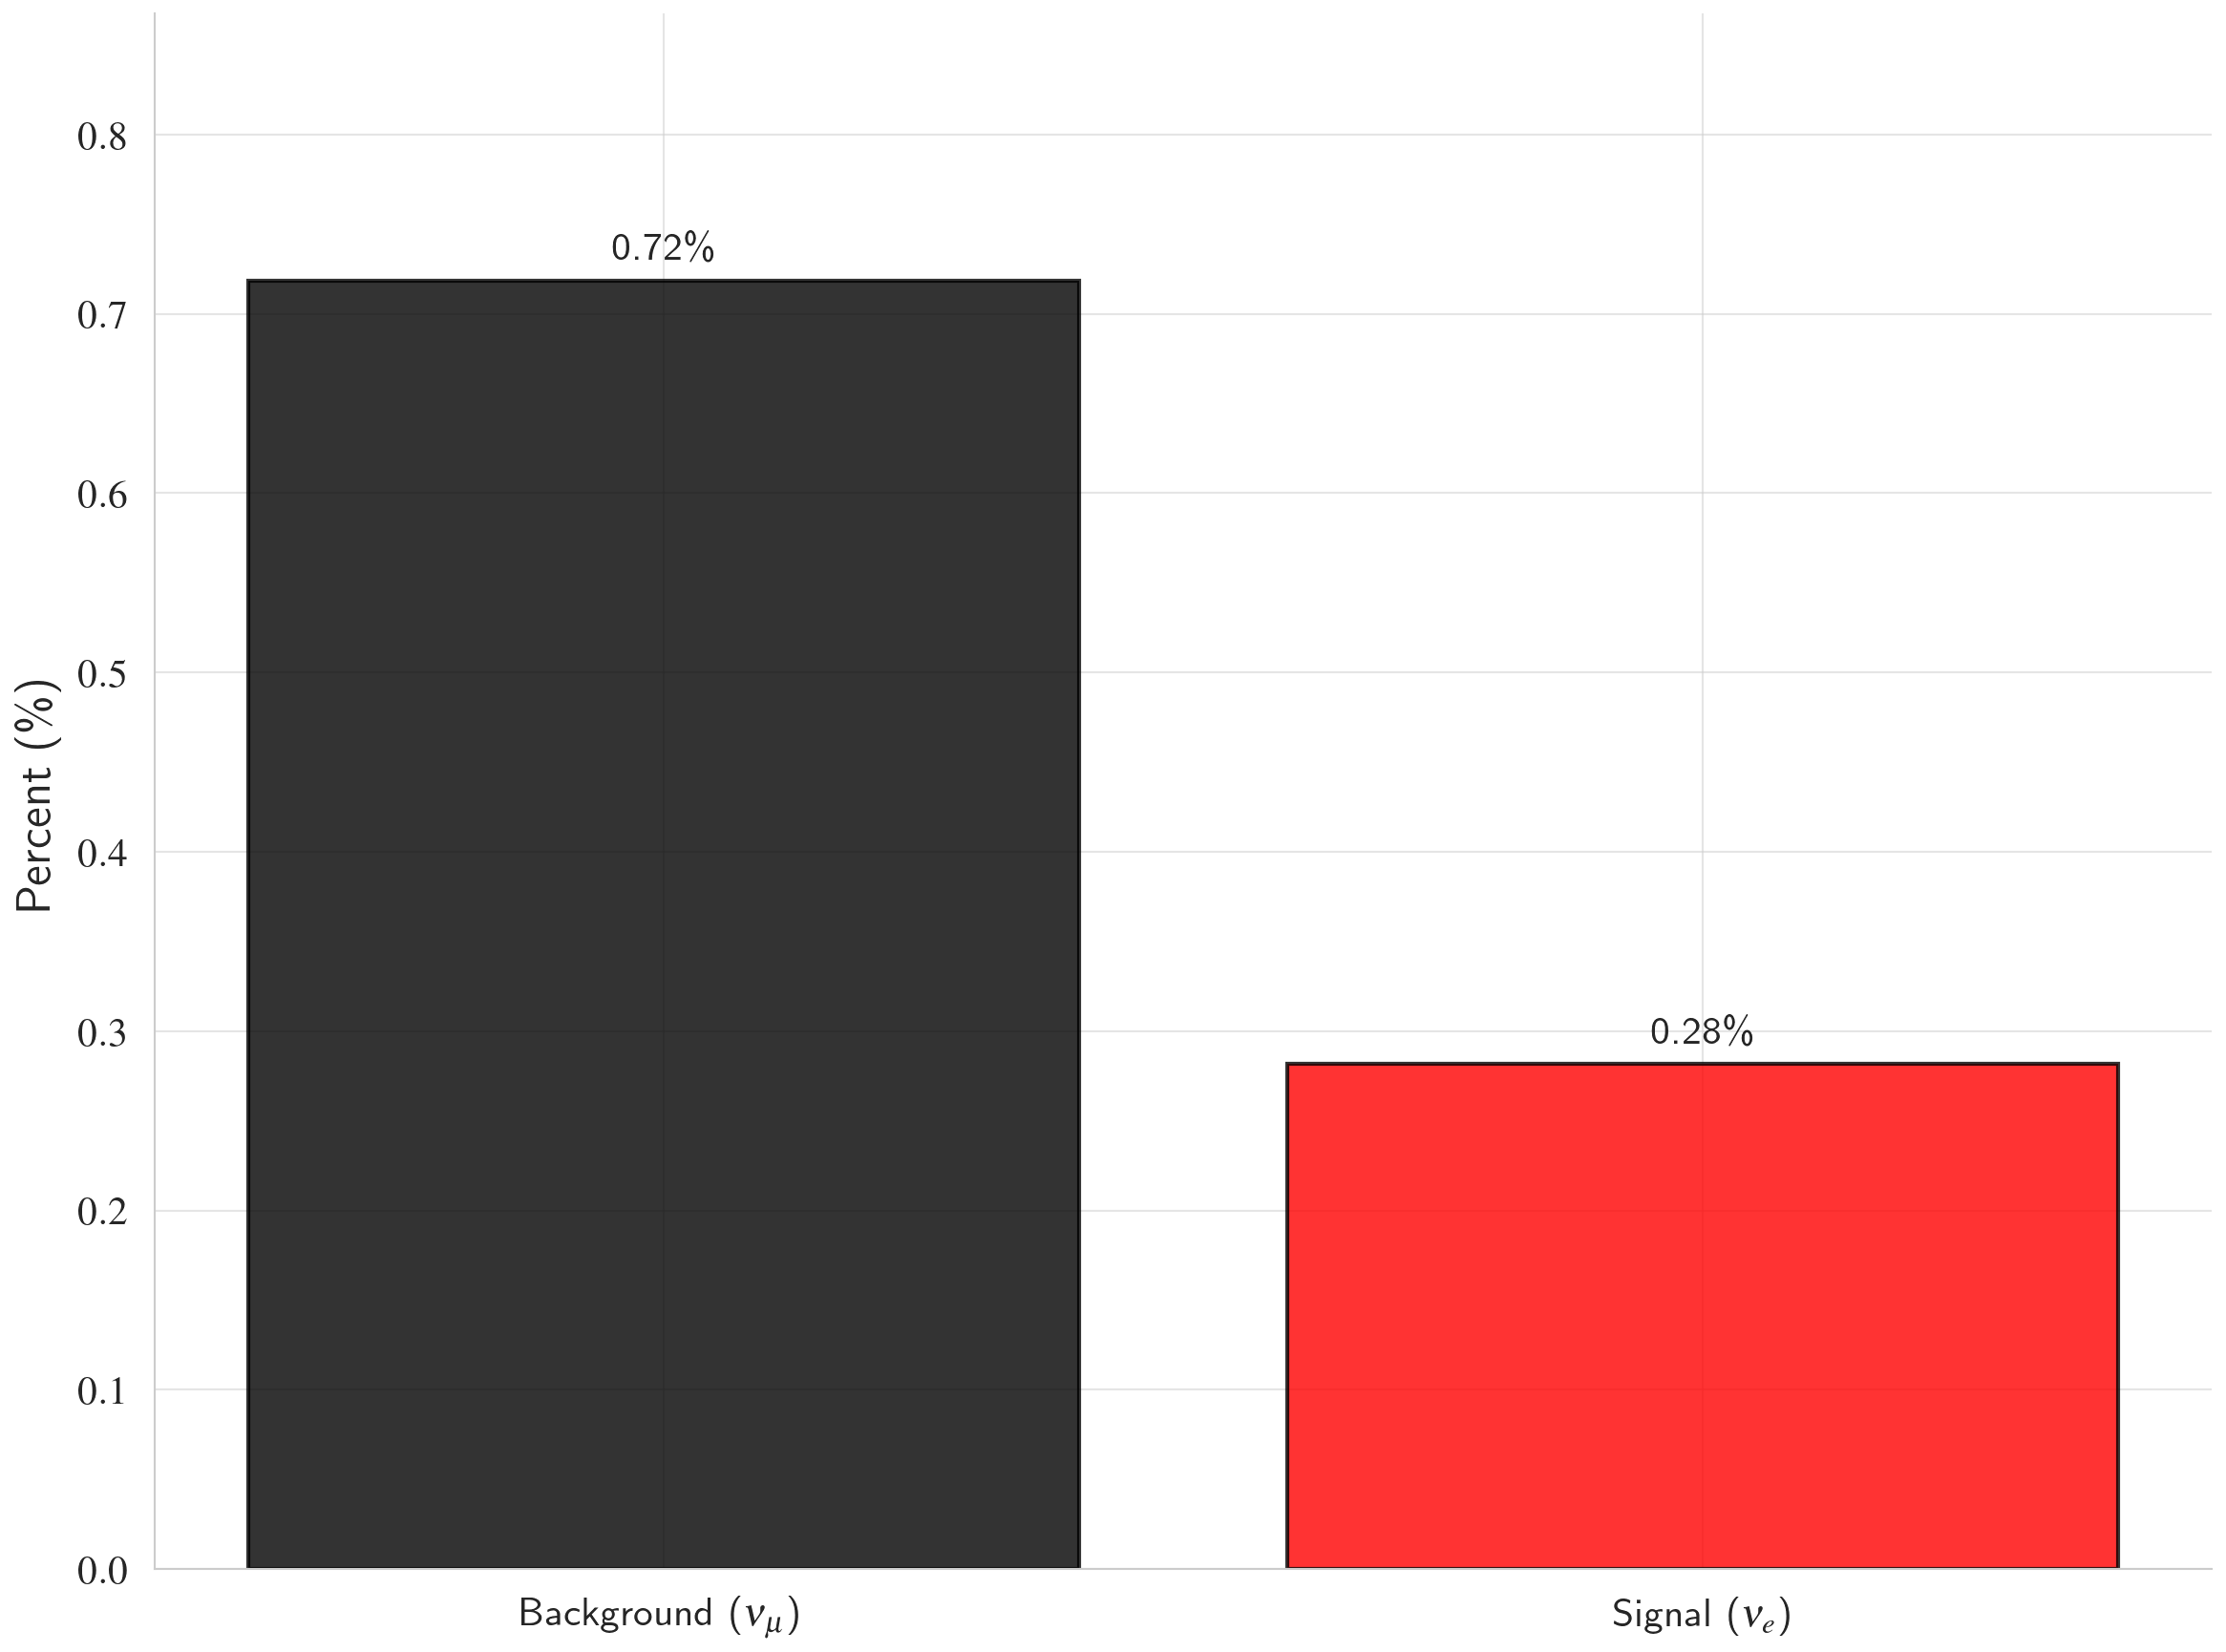

In [ ]:
fig_target = plotter.create_target_distribution_plot(df, stat="percent", how_legend=True, n_boot=0)